## Ensembles - Bagging and Boosting

Ensembles work on a simple yet powerful principle: by bringing together diverse models, their strengths can reinforce one another, and their weaknesses can be countered. This often leads to predictions that are more accurate and robust.
Among the most widely used ensemble methods are bagging and boosting. 

**Bagging**, short for bootstrap aggregating, trains multiple models on different random samples of the data and then combines their outputs. A prime example of this approach is the random forest, which grows many decision trees and averages their predictions. This reduces variance and makes the model more stable. Examples: random forest, bagged k-nearest neighbours (kNN)

Bagging = Bootstrapping + Aggregation

**Boosting**, on the other hand, builds models sequentially, where each new model focuses on correcting the errors of the previous ones. Gradient boosting is a classic method in this family, training trees in a way that follows the gradient of the loss function, steadily improving predictions over time. Boosting reduces bias and often achieves very high accuracy, though at the cost of greater complexity. Example: AdaBoost, XGBoost, LightGBM

**Stacking (Stacked Generalisation)**: Combines the predictions from different types of models using another model to decide the final output. Examples: Stacked classifiers and regressors where models like logistic regression, support vector machines (SVMs), and neural networks are combined


Despite the growth of deep learning, ensembles remain a cornerstone of machine learning for their balance of accuracy, interpretability, and flexibility across many problem domains. 

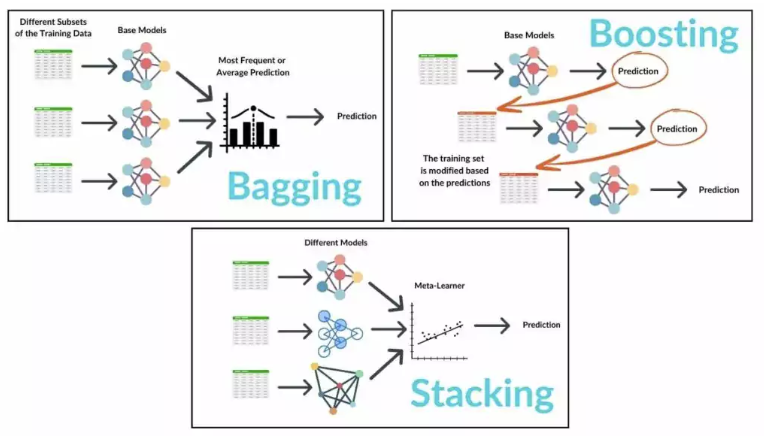

### Is Bagging only applied to decision trees?

No, bagging is not only for decision trees; it is a versatile ensemble method that can be used with any machine learning model, though it is most commonly associated with decision trees because it effectively reduces their high variance and prevents overfitting. Bagging works by creating multiple models from bootstrapped samples of the training data and aggregating their predictions. 

**does random forest only use decision trees?**
Yes, Random Forests use only Decision Trees as base learners — but it’s not just any trees; they’re bagged, randomized decision trees.

### Ensembles in the Context of Decision Trees
Decision trees are popular base models for ensembles because they are flexible, non-parametric, and capable of capturing complex, non-linear relationships in data. They handle both numerical and categorical variables, work well with missing values, and require little preprocessing, making them versatile building blocks.

At the same time, individual trees tend to overfit and can be highly unstable. This weakness becomes a strength in ensembles: when many diverse trees are combined, their variations cancel out, leading to models that are accurate, robust, and scalable. This combination of simplicity at the base level and power when aggregated makes trees the backbone of many successful ensemble methods.

---

### Ensembles: Bagging 

The main idea behind bagging, or bootstrap aggregating, is that a single model may give a unreliable picture of the data because it learns patterns too closely tied to one sample. By training many models on different random samples, we can reduce this instability and get a more reliable outcome.

Think of it like asking multiple people to guess the weight of an object. One person might guess too high, another too low, but if we take the average of everyone’s guesses, we usually end up very close to the true value. Bagging works in the same way: it averages predictions for regression or takes a majority vote for classification, smoothing out the
extremes.

This process reduces variance — the tendency of a single model to fluctuate wildly depending on the training data. By combining many “noisy” predictors, bagging produces a stronger and more stable model that is less likely to overfit and more likely to generalise well to unseen data.

Consider the following as an example of how bagging operates. On the left, we have an overfit classifier which is makes predictions on its own. On the right, we instead have three weak classifiers aggregating their predictions via majority vote. You can see how, although these classifiers are weaker, they outperform the lone classifier.

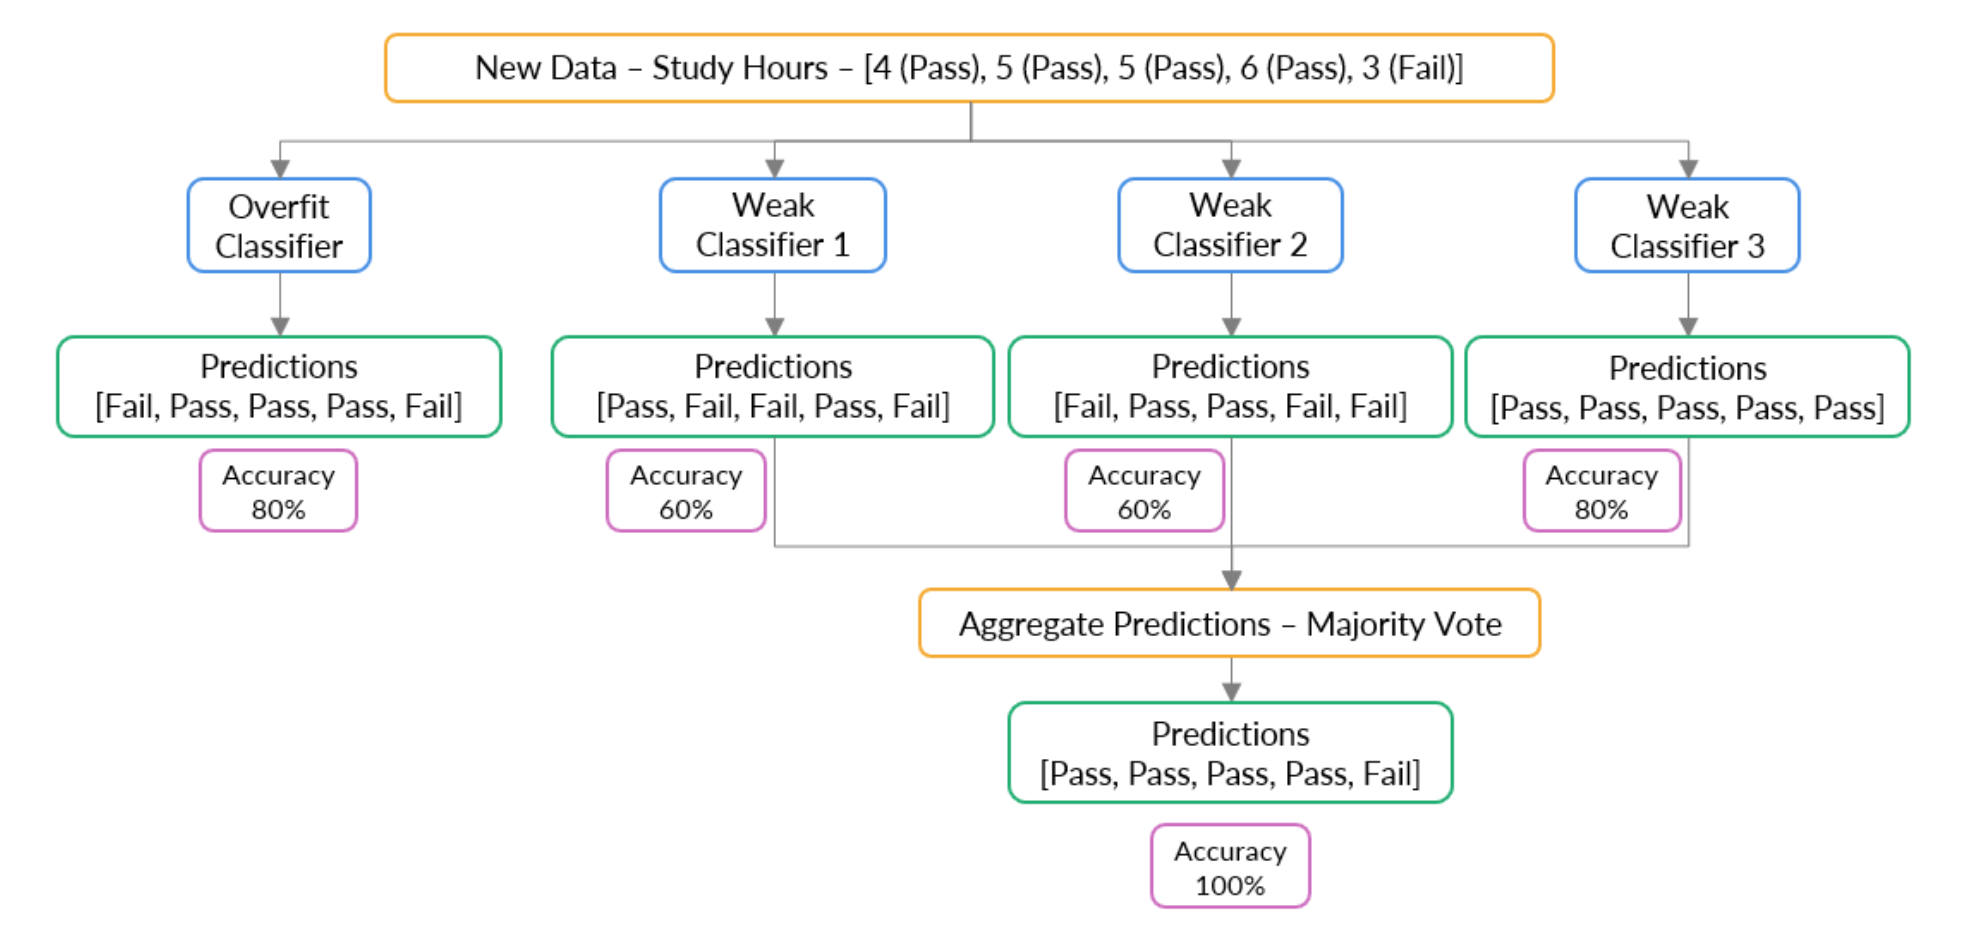

Below is an example of how trees work in tandem to detect if a learner is likely to pass or fail in their exams depending on their previous score, their board of education, and the number of hours they study. Note that this is a simplified example and the actual mechanisms would vary depending on the algorithm used.

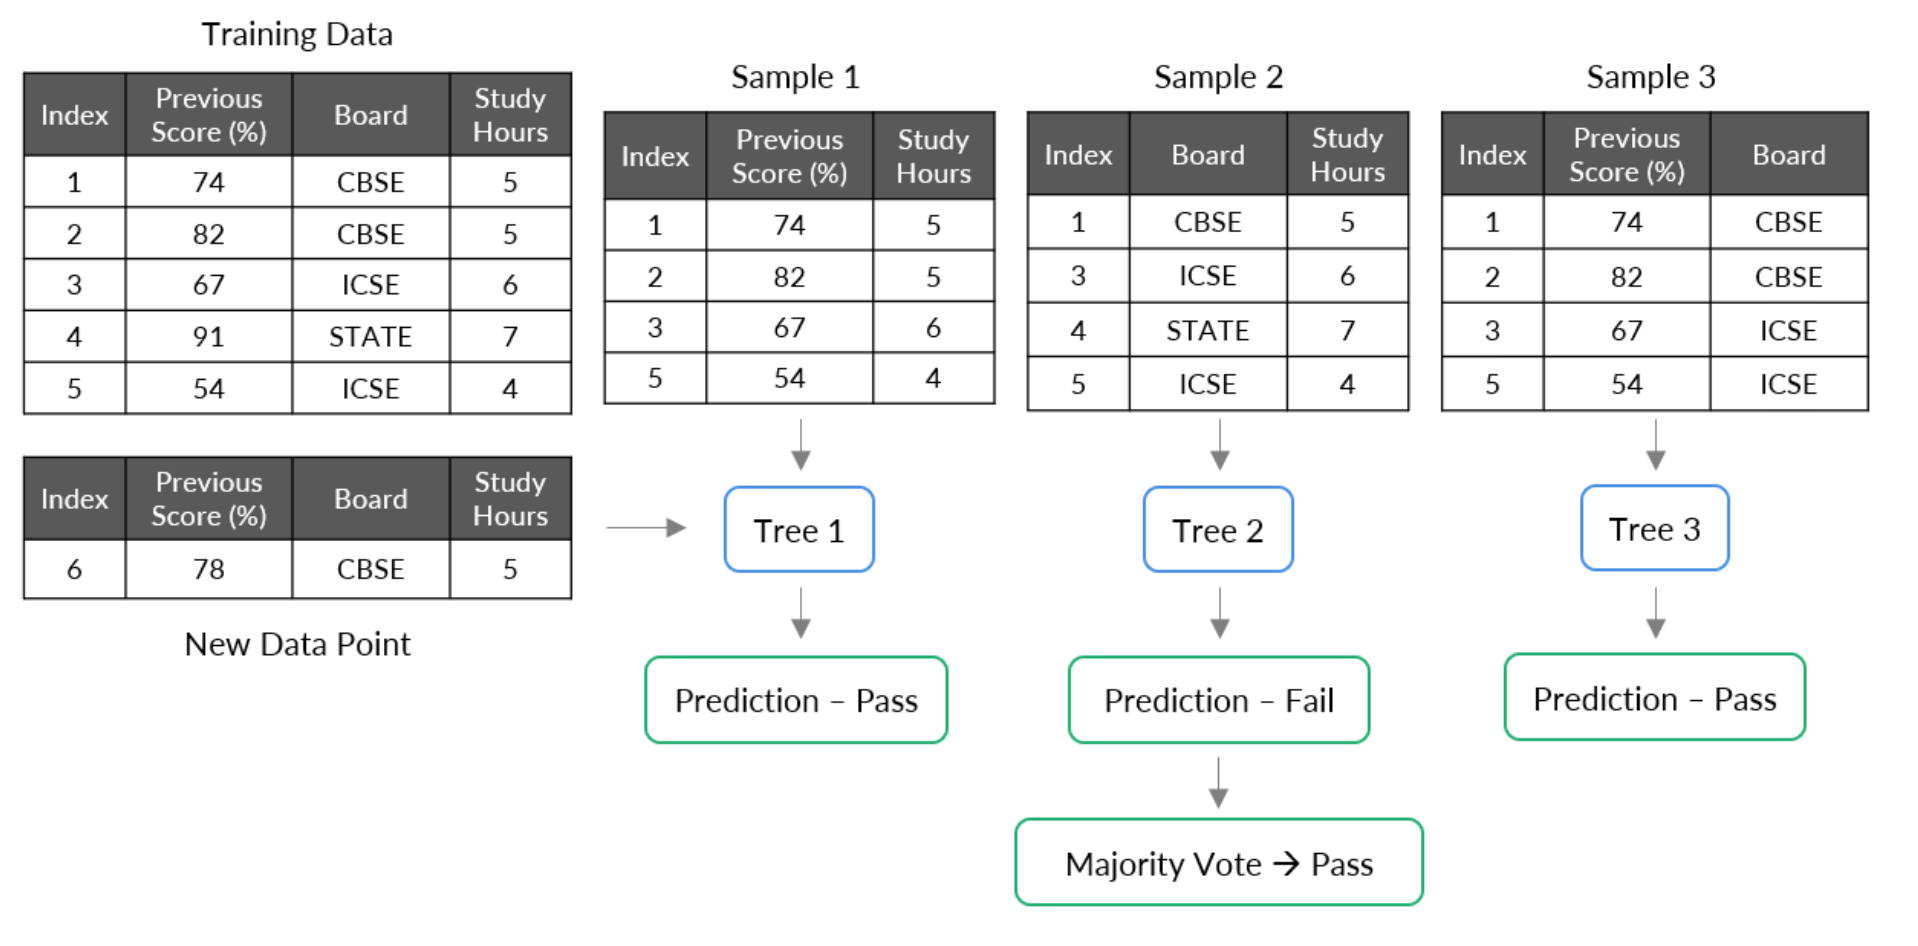

### Bagging = 2 levels of randomness

When building each model in a bagging ensemble, you can randomize:

| Type              | What you randomize                     | Why it helps                                                    |
| ----------------- | -------------------------------------- | --------------------------------------------------------------- |
| **Sample-level**  | which rows (data points) are drawn     | Reduces variance by giving each model slightly different data   |
| **Feature-level** | which columns (features) are available | Reduces correlation between models and avoids dominant features |

#### 1. Sample Selection Techniques
##### (a) Bootstrap Sampling (Default Bagging)
- Each model is trained on a bootstrap sample — random sample with replacement of size N (same as training size).
- On average, each bootstrap sample contains ~63.2% unique rows (some repeated).
- The remaining ~36.8% of data are Out-of-Bag (OOB) samples → useful for validation.
- ✅ Common in: BaggingClassifier, RandomForest, BaggingRegressor (with bootstrap=True).

##### (b) Subsampling Without Replacement
- Instead of sampling with replacement, we take a random subset without replacement.
- Example: select 80% of training data for each model.
- Slightly less diversity, but often less variance in OOB estimates.
- ✅ Controlled via: bootstrap=False in sklearn’s BaggingClassifier.

##### (c) Weighted Sampling (Probability-based)
- Less common, but sometimes you can weight data points (e.g., to oversample rare cases or balance classes).
- Example: Weighted bagging for imbalanced datasets, or for stratified bagging.
- ✅ Implemented via custom sampler or reweighting before fitting.

##### (d) Pasting
- Coined by Breiman (1999): sample without replacement from the training data.
- Sometimes called “Pasting Small Votes”.
- Each model sees a fraction (like 50%) of data without replacement.
- Slightly faster and sometimes better on small datasets.
- ✅ Equivalent to setting bootstrap=False and max_samples < 1.0.

#### 2. Feature Selection Techniques (Column Subsampling)

The idea: don’t give all features to each model → reduce correlation between them.

##### (a) All Features (Plain Bagging)
- Every model sees all predictors.
- Diversity comes only from different samples.
- Works fine, but models can still be highly correlated if some features dominate.

##### (b) Random Feature Subset (Random Subspaces)
- Each base model sees only a random subset of features.
- Introduces additional diversity, prevents overreliance on strong predictors.
```pythoon 
BaggingClassifier(..., max_features=0.8, bootstrap_features=True)
```
- max_features: number (or fraction) of features per model.
- bootstrap_features=True: sample features with replacement.
- This is called the **Random Subspace Method** .

##### (c) Random Feature Selection at Split Level (Random Forest Style)
- Each tree considers a random subset of features at each split, not just once per model.
- This further decorrelates trees → the key innovation behind Random Forests.
- Parameters:
    - max_features (commonly √p for classification, p/3 for regression)
    - Sampling is done fresh at every node split.
- ✅ Implemented automatically in RandomForestClassifier.

##### (d) Feature Bagging
- Generalization: randomly sample both rows and columns for each model.
- Each base learner works in a smaller “subspace” of the data matrix.
- Useful for very high-dimensional data (e.g., text, genomics).

#### How sklearn handles this

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8,          # 80% of data per model
    bootstrap=True,           # with replacement
    max_features=0.6,         # 60% of features per model
    bootstrap_features=False, # without replacement for features
    oob_score=True,
    random_state=42
)
bag.fit(X_train, y_train)
```

This means:
- Each tree gets 80% of data (bootstrapped)
- Each tree sees 60% of features randomly selected
- Predictions are averaged (bagging)


### Random Forests

A random forest is an ensemble of decision trees built using the principles of bagging with an extra layer of randomness. Instead of growing just one tree on the full dataset, it grows many trees, each trained on a different random subset of the data created through bootstrapping.

When each tree is trained, it does not consider all available features at every split. Instead, only a random subset of features is chosen for each decision point. This ensures the trees are diverse, as different features drive different splits across the forest.

Once all the trees are built, their predictions are combined: by majority vote in classification tasks, or by averaging in regression tasks. The combination reduces overfitting, improves stability, and leverages the collective wisdom of many varied trees to achieve stronger performance than any single tree alone.

Consider the following example of a single new data point being classified using a random forest. Here, there are two classes: A and B. We can see how the predicted probabilities for the point being classified as belonging to A or B are aggregated using simple averaging. The mechanism is similar for multiclass classification.

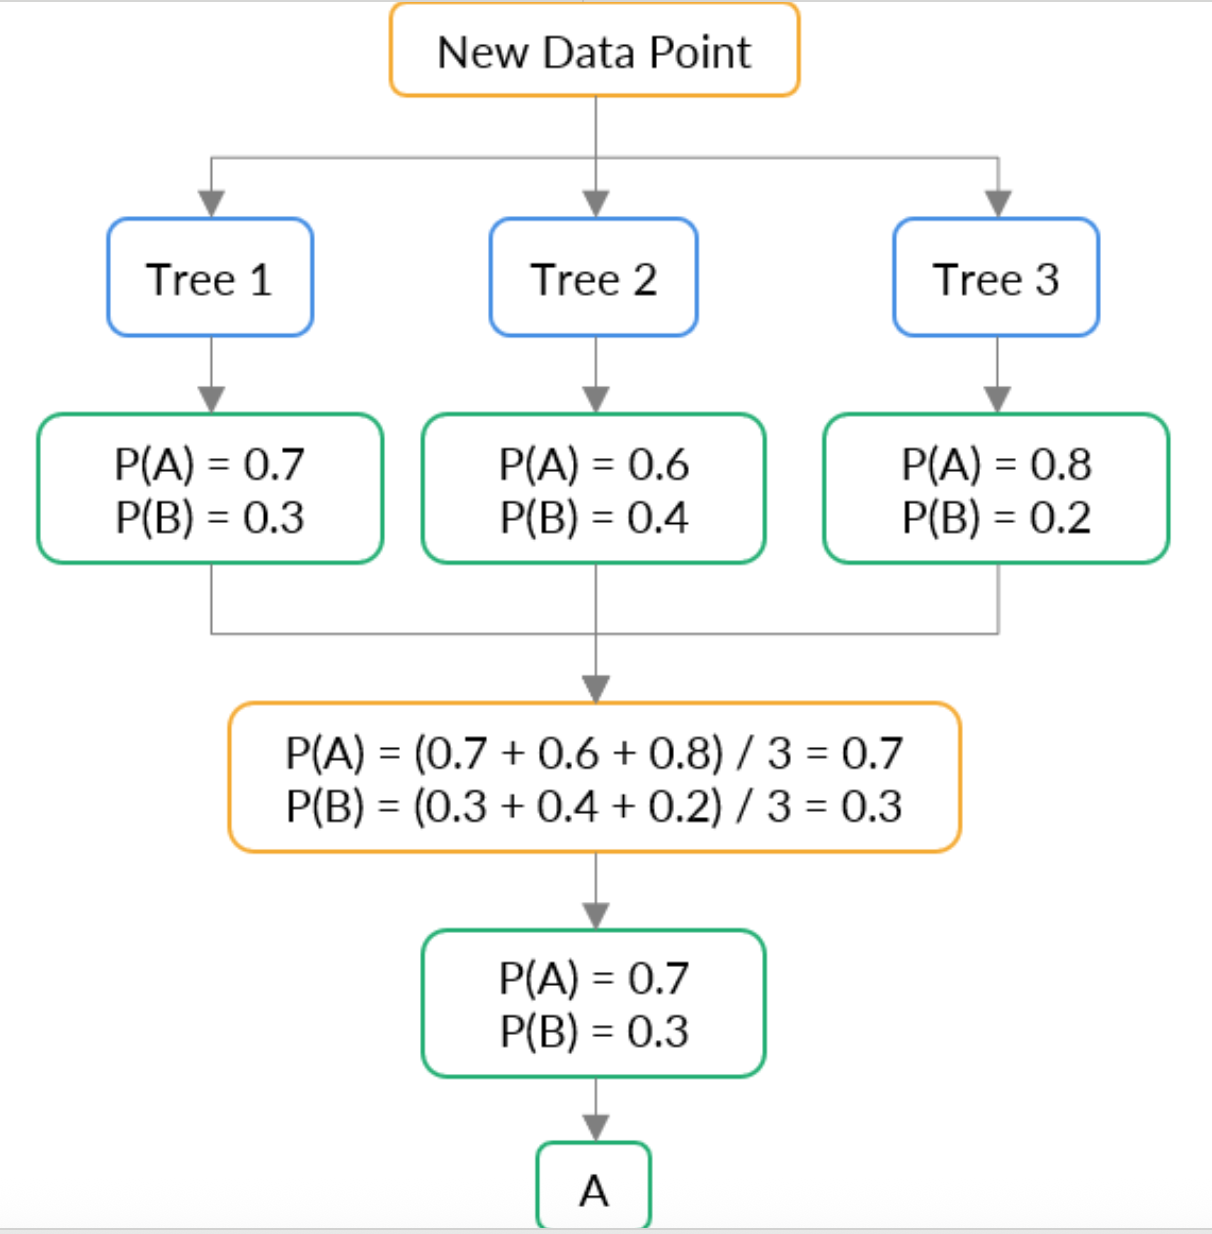

Consider the following example for the regression case, showing once again how averages are used to simulate majority vote

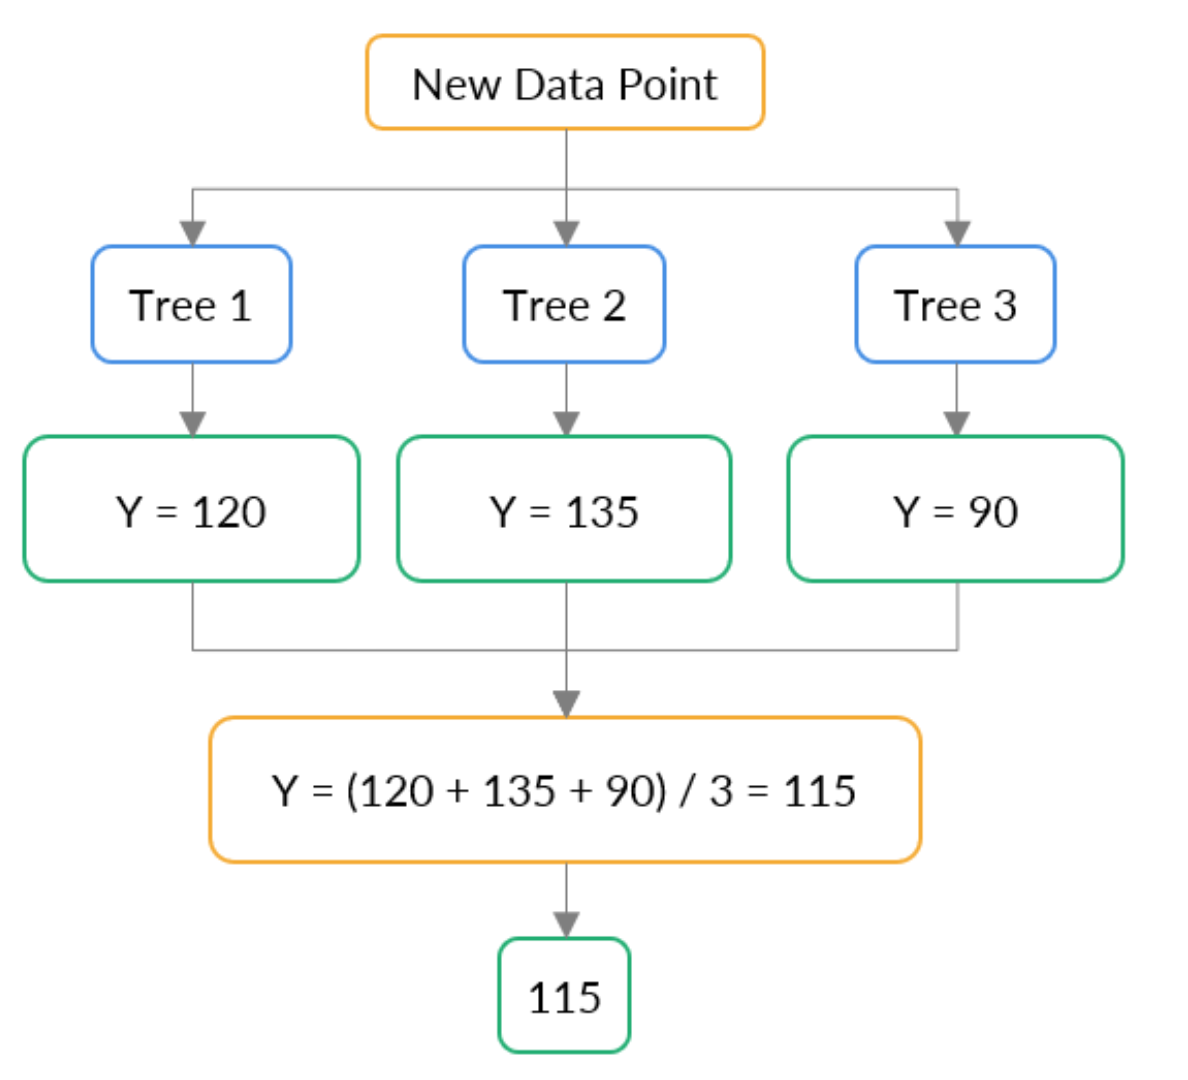

### Evaluating Random Forests
Evaluating a random forest follows the same principles as other supervised learning models. Its performance is typically assessed on unseen test data using standard metrics such as accuracy, precision, recall, and F1-score for classification, or mean squared error and R² for regression. These measures help determine how well the model generalises
beyond the training set.

One advantage of Random Forests is that they provide additional built-in evaluation tools. The out-of-bag (OOB) error is an internal estimate of prediction error, obtained from the samples not included in each tree’s bootstrap dataset. This gives a reliable performance estimate without needing a separate validation set.

Another useful feature are the feature importance scores, which rank variables by how much they contribute to the predictive power of the model, offering interpretability alongside performance.

| **Advantages of Random Forests**                                       | **Disadvantages of Random Forests**                                  |
| ---------------------------------------------------------------------- | -------------------------------------------------------------------- |
| High accuracy and robustness; generalises well to unseen data          | Less interpretable than a single decision tree                       |
| Handles both numerical and categorical data with minimal preprocessing | Computationally intensive; requires more memory and processing power |
| Reduces overfitting by combining multiple diverse trees                | Slower predictions due to many trees being evaluated                 |
| Provides feature importance scores for interpretability                | Performs poorly when asked to extrapolate beyond training data       |
| Can handle large datasets and missing values effectively               | May be less efficient than simpler models on smaller datasets        |


### Key Hyperparameters of Random Forests

Below are some of the key hyperparameters of random forests. Do note that the availability of these parameters as well as their names in Python would depend on the library used and varies between different implementations.
- **Number of trees**: This determines how many decision trees make up the forest
- **Maximum tree depth**: This defines how deep each tree is allowed to grow before stopping
- **Minimum samples per split**: This sets the smallest number of data points needed to create a split in a node
- **Minimum samples per leaf**: This specifies the least number of data points required in a terminal (leaf) node
- **Number of features considered at each split**: This controls how many features each tree examines when finding the best split
- **Sampling method**: This indicates whether each tree is trained on a random sample of the data, with or without replacement
- **Sample size per tree**: This determines the proportion or count of data used to train each tree
- **Randomness control**: This manages how random sampling and feature selection are handled to ensure diversity among trees
- **Class or sample weighting**: This adjusts the influence of certain classes or samples, which is useful for imbalanced data
- **Parallel processing**: This specifies how many computational resources or processors are used when building the forest

In addition, you may also tune for the parameters of individual decision trees used by the
forest.

---

---

### Boosting
Boosting builds on a simple yet powerful idea: instead of training many models independently, as in bagging, it trains them sequentially, with each new model learning from the mistakes of the ones before it. The goal is to gradually turn a collection of weak learners into one strong, accurate predictor.

Imagine a classroom where several tutors help a student master a subject. The first tutor explains the basics, but the student still struggles with some topics. The next tutor focuses specifically on those weak areas, and each subsequent tutor continues to refine the student’s understanding based on what’s still not clear. By the end, the student has benefited from many small corrections — each one targeted to earlier errors.

In the same way, boosting gives more attention to data points that earlier models handled poorly. Each model tries to correct previous errors, and their combined effort produces a final model that is far more precise. This process reduces bias — the systematic error from overly simple models — while maintaining low variance. The result is a model that learns deeply from its mistakes, offering high accuracy and strong generalisation across diverse datasets.

Given below is a simple example of how boosting occurs using two learners. The first learner is only predicting the mean of the training target, while the next learner trains to predict the residuals left by this prediction. Note that this is a simplified example not accounting for factors such as the learning rate. The actual mechanisms would vary depending on the algorithm used.

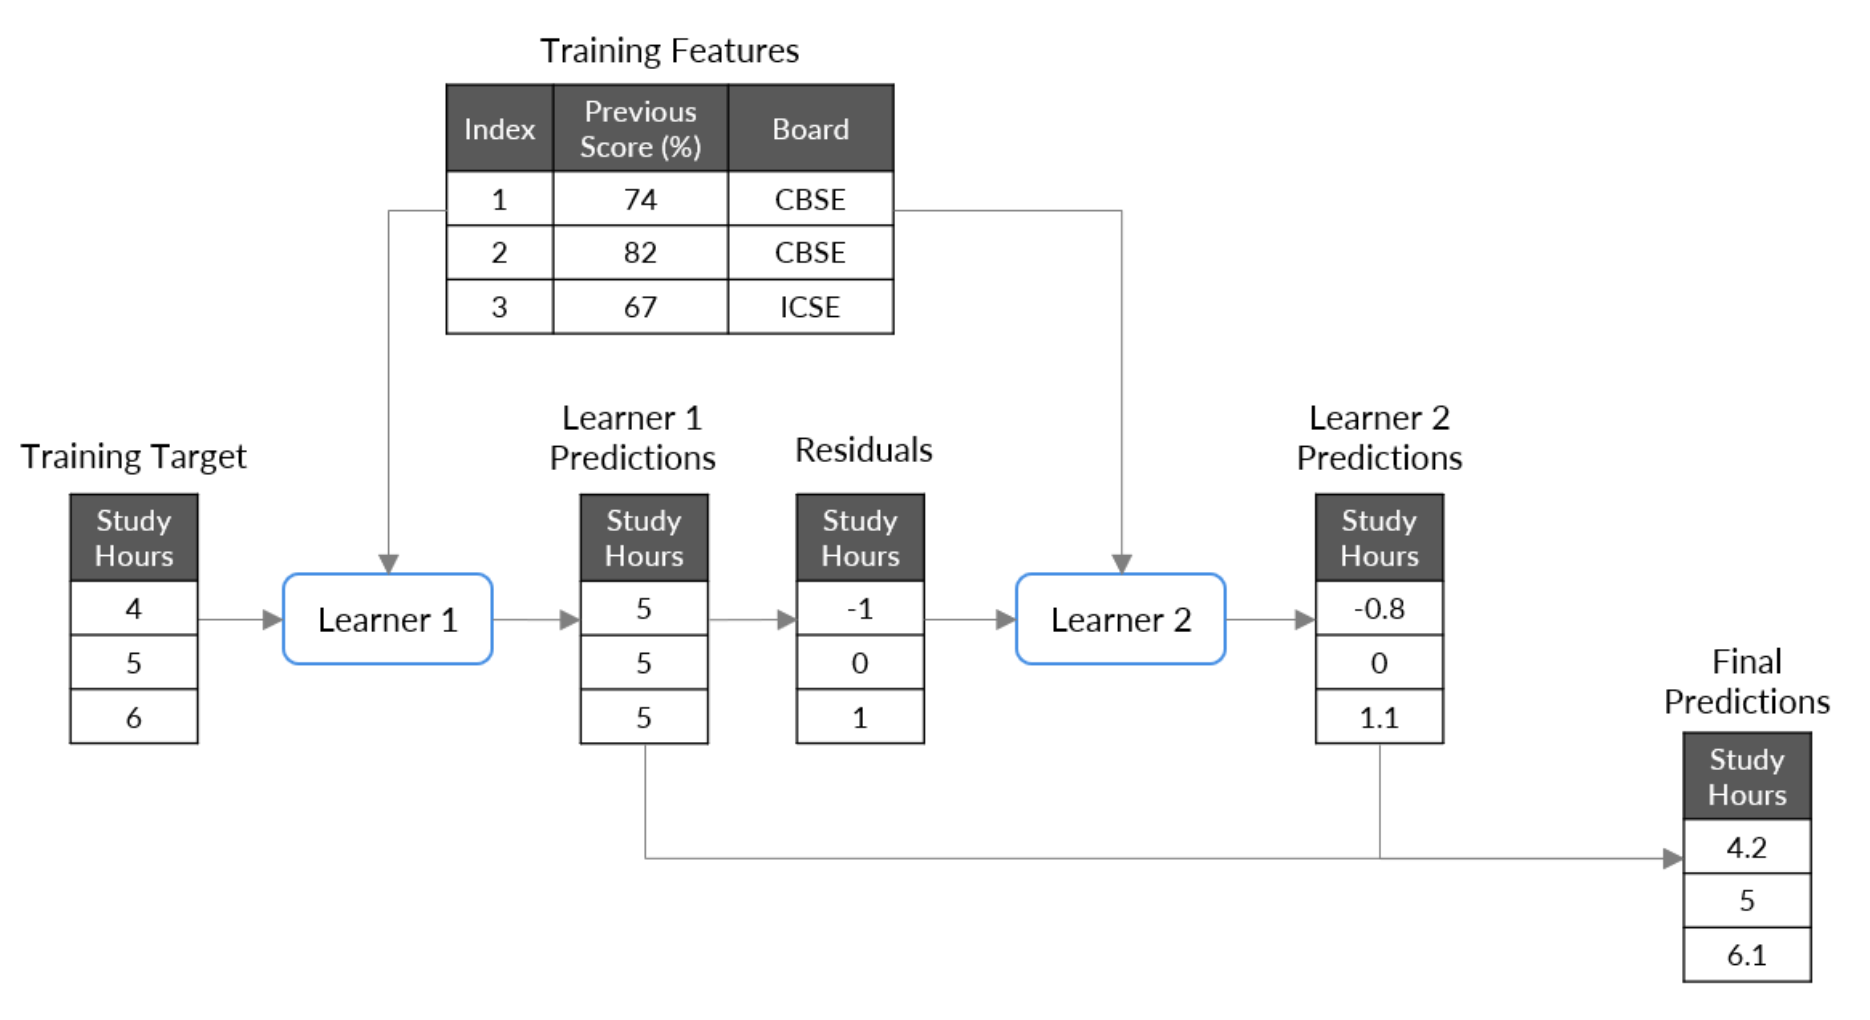

### Sample Selection Strategies in Boosting

So the sampling logic in boosting isn’t random bootstrap; it’s weight-driven focus on hard examples.

| Technique                                                             | How samples are selected                                                                                                                                         | Why it’s done                                                                         | Used in                                                                         |
| --------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Weighted re-sampling (AdaBoost)**                                   | Each training instance gets a **weight**. The next model samples (or reweights) so that misclassified points get **higher weight**.                              | Forces next learner to focus on hard-to-classify cases.                               | AdaBoost (Adaptive Boosting)                                                    |
| **Gradient-based reweighting (Gradient Boosting, XGBoost, LightGBM)** | Instead of discrete weights, every data point has a **residual or gradient**. The next model fits these residuals (pseudo-residuals = “what’s left to predict”). | Minimizes the loss function iteratively (like gradient descent in function space).    | Gradient Boosting, XGBoost, CatBoost                                            |
| **Subsampling (Stochastic Boosting)**                                 | Randomly sample a fraction (e.g., 50–80%) of rows for each new tree — *independent of gradient weights.*                                                         | Adds randomness to reduce correlation and overfitting (stochastic gradient boosting). | GradientBoostingRegressor, XGBoost (`subsample`), LightGBM (`bagging_fraction`) |
| **Row Sampling with Replacement**                                     | Rarely used in boosting (mainly without replacement).                                                                                                            | Bootstrapping conflicts with weight-based updates.                                    | Rare, mostly experimental                                                       |

Summary:
- Bagging: random sampling (with replacement).
- Boosting: deterministic weighting + optional random subsampling (for regularization).


### Feature Selection/ Sampling in Boosting

Boosting algorithms also randomize features to reduce correlation among trees.

| Technique                                 | What it does                                                                          | Implementation examples                                                             |
| ----------------------------------------- | ------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------- |
| **Feature subsampling (column sampling)** | Each new tree sees only a random subset of features.                                  | XGBoost: `colsample_bytree`, LightGBM: `feature_fraction`, sklearn: `max_features`. |
| **Feature subsampling per split**         | Each split in a tree considers only a random subset of features (like random forest). | XGBoost: `colsample_bylevel`, LightGBM: `feature_fraction_bynode`.                  |
| **No feature sampling**                   | Default in plain Gradient Boosting (sklearn) — every feature is available.            | Scikit-learn GradientBoostingClassifier default.                                    |




Why this helps:
- Reduces overfitting by decorrelating base trees.
- Speeds up training on high-dimensional data.
- Acts as another regularization layer.

### Gradient Boosting
Gradient boosting is an ensemble technique that builds models sequentially, with each new model attempting to correct the errors of the combined models before it. Unlike random forests, where all trees are built independently, gradient boosting creates a chain of models that learn from the residual mistakes of the previous ones.

At the start, a simple model makes an initial prediction, denoted as 𝑦̂(1). This simple model is the baseline or naïve model and often simply predicts the mean of the data. The difference between the actual and predicted values is the error or residual, 𝑒(1) = 𝑦 − 𝑦̂(1).

The next learner is then trained to predict this residual, producing 𝑒̂ (1) . The model’s prediction is updated as 𝑦
̂(2) = 𝑦̂(1) + 𝜈𝑒̂ (1) , where 𝜈 (the learning rate or step size) controls how much correction is applied at each step.
After this update, a new residual is computed as 𝑒(2) = 𝑦 − 𝑦̂(2), and the process continues for 𝑚 learners. The final prediction after 𝑚 iterations is 𝑦̂(𝑚) = 𝑦̂(𝑚−1) + 𝜈𝑒̂ (𝑚−1).

This gradual, step-by-step improvement ensures that the model learns cautiously and avoids overfitting. Each learner moves the predictions in the direction that most reduces the loss function — this is what the “gradient” in gradient boosting refers to. Below is an example of how predictions are made for a single new point using simple gradient boosting comprising of a baseline model followed by two tree learners.

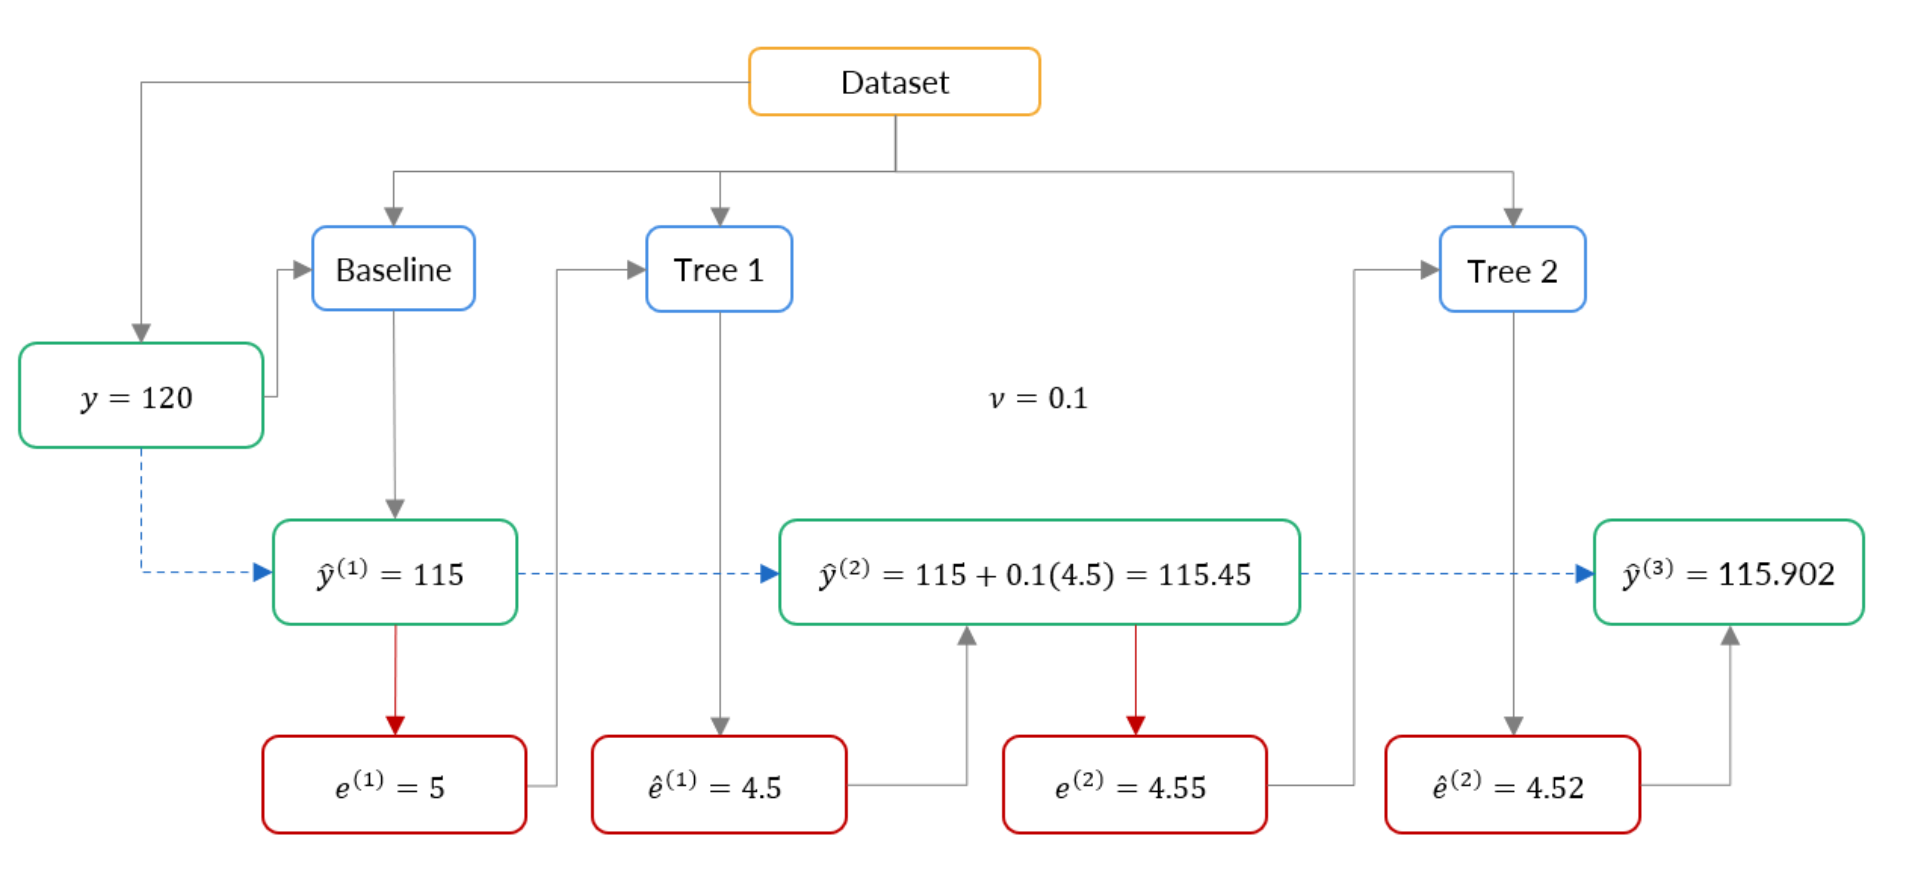

The classification case would follow a similar mechanism but would involve probabilities representing the likelihood of each class. 

Through this targeted correction process, gradient boosting reduces bias and achieves high accuracy. When tuned properly, it often outperforms other ensemble methods, though it requires careful control to prevent overfitting.

### Evaluating Gradient Boosting

Evaluating a boosting model follows the same principles as other supervised learning algorithms. Its performance is assessed on unseen test data using standard metrics such as accuracy, precision, recall, and F1-score for classification tasks, or mean squared error and R² for regression. These metrics reveal how effectively the model generalises beyond the training data.

Another powerful diagnostic are the feature importances, which show how much each feature contributes to reducing the overall loss. This allows for a clearer interpretation of which variables drive the model’s predictions.

Finally, because boosting models are sensitive to overfitting, techniques such as early stopping—where training halts once validation performance no longer improves—are used to fine-tune performance while maintaining generalisability.

| **Advantages of Gradient Boosting**                                                                 | **Disadvantages of Gradient Boosting**                                                                 |
| --------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| Produces highly accurate models by sequentially correcting errors from previous learners            | More prone to overfitting if the learning rate is too high or the model is over-trained                |
| Handles both classification and regression problems effectively                                     | Computationally expensive due to sequential training of learners                                       |
| Works well with weak learners (e.g., shallow trees) to create a strong ensemble                     | Slower to train compared to parallel methods like Random Forests                                       |
| Focuses more on difficult-to-predict samples, improving predictive performance                      | Sensitive to noise and outliers, as these can be repeatedly emphasised during boosting                 |
| Can incorporate regularisation techniques (like shrinkage or subsampling) to improve generalisation | Requires careful tuning of hyperparameters such as learning rate, number of estimators, and tree depth |


### Key Hyperparameters of Gradient Boosting

Below are some of the key hyperparameters commonly used in gradient boosting models. Do note that the availability and exact naming of these parameters can vary across different libraries and implementations.
- **Number of estimators**: Determines how many weak learners (typically decision trees) are added sequentially to build the ensemble
- **Learning rate**: Controls the contribution of each learner to the final model; lower values make learning slower but often yield better generalisation
- **Maximum tree depth**: Defines how complex each individual tree can be, influencing both bias and variance
- **Minimum samples per split**: Sets the minimum number of samples required to split an internal node within each tree
- **Minimum samples per leaf**: Specifies the minimum number of samples that must be present in a leaf node
- **Subsample ratio**: Indicates the fraction of the training data randomly selected for each boosting round, helping reduce overfitting
- **Loss function**: Defines the error metric that the algorithm minimises, such as mean squared error for regression or logistic loss for classification
- **Number of features considered per split**: Controls how many features are randomly selected for evaluating the best split at each node
- **Regularisation parameters**: Include penalties such as L1 or L2 terms to constrain model complexity and improve generalisation
- **Early stopping criteria**: Specifies when training should stop if performance on a validation set stops improving
- **Randomness control**: Manages the reproducibility of results and the random selection of samples or features during training

In addition, you may also tune hyperparameters related to the base learners used within the boosting framework, such as decision tree depth or leaf configuration.

---

### Bagging vs Boosting
Here are some of the differences between bagging and boosting:

| **Bagging**                                                                        | **Boosting**                                                                          |
| ---------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| Trains learners independently in parallel on random subsets of data                | Trains learners sequentially, each correcting the errors of the previous ones         |
| Improves predictions by aggregating using averages                                 | Improves predictions in a step-by-step manner                                         |
| All learners are given equal weight in the final model                             | Learners may be weighted based on their performance                                   |
| Less prone to overfitting, works well with moderately strong learners (full trees) | More prone to overfitting if not tuned, works best with weak learners (shallow trees) |


## Applications of Ensembles

Ensemble methods have found wide application across domains because of their ability to improve prediction accuracy and stability. In finance, they are used for credit scoring, fraud detection, and stock trend prediction, where combining multiple models helps manage uncertainty in data and reduce the risk of overfitting. By blending the outputs of different algorithms, ensemble models provide a more reliable assessment of risk or opportunity than any single model could achieve.


In healthcare, ensembles are used for diagnostic prediction, disease classification, and treatment outcome analysis. Models such as random forests and gradient boosting can process complex and high-dimensional clinical data to identify subtle patterns that might be missed by traditional techniques. They also play an important role in genomics, medical imaging, and patient survival analysis, where accuracy and interpretability are both essential.

Within marketing and customer analytics, ensemble methods power recommendation systems, churn prediction, and customer segmentation. By combining different models trained on demographic, behavioural, and transactional data, organisations can obtain
more precise insights into customer behaviour and personalise their strategies effectively.

In the broader field of data science and artificial intelligence, ensembles are fundamental to improving the robustness of predictive systems. They are frequently used in competitions, research, and production environments because they balance bias and
variance effectively. Whether applied to classification, regression, or ranking tasks, ensemble techniques have become a cornerstone of modern machine learning practice.

----

## Bias Variance tradeoff

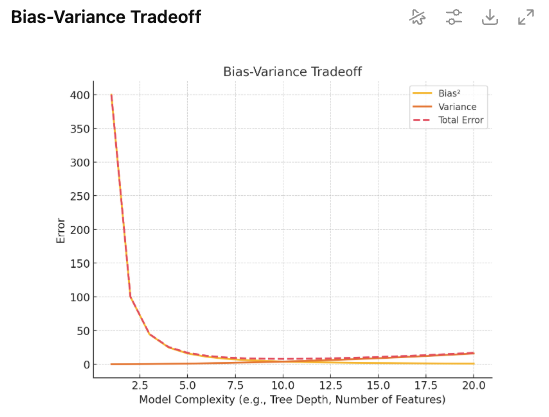

Bias–Variance Tradeoff:

- As model complexity increases (e.g., deeper trees, more features),
- Bias² decreases (the model fits better).
- Variance increases (model becomes sensitive to noise).
- The total error first decreases, then increases — the “sweet spot” is where total error is minimal.

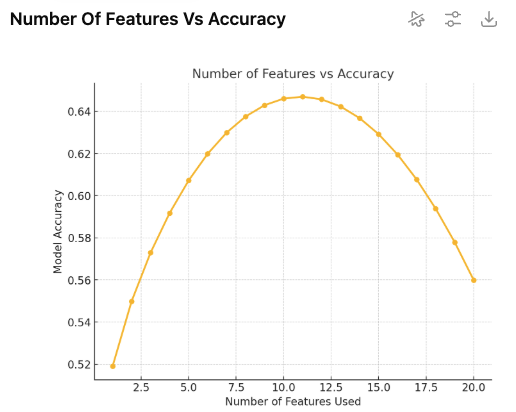

Number of Features vs Accuracy:
- Initially, adding features improves accuracy (model learns more patterns).
- Beyond a point, accuracy plateaus or drops slightly due to overfitting or irrelevant/noisy features.

Interpretation:
- In practical ML, we aim for the region of moderate complexity — low enough bias to fit the data but not so high that variance dominates.
- Feature selection (via regularization, tree pruning, or PCA) helps stay near that optimal point.

---
---

## Bagging vs AdaBoost

### Intuitive Analogy
| Analogy               | Bagging                                                                                              | AdaBoost                                                                                           |
| --------------------- | ---------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| **Classroom analogy** | 10 students solving the same exam independently → take the average of their answers (reduces noise). | One student solving sequentially, learning from each mistake after feedback (improves weak areas). |
| **Philosophy**        | “Let’s get many diverse opinions and average them.”                                                  | “Let’s learn step-by-step, focusing on what we got wrong.”                                         |

gets to the core difference between variance reduction and bias correction in ensemble learning.

| Aspect                    | **Bagging** 🌳                                                                          | **AdaBoost** ⚡                                                                               |
| ------------------------- | --------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| **Full Name**             | Bootstrap Aggregating                                                                   | Adaptive Boosting                                                                            |
| **Core Idea**             | Train models **independently** on **different random samples**, then average (or vote). | Train models **sequentially**, each one focuses more on the **errors** of the previous.      |
| **Goal**                  | Reduce **variance** (stabilize high-variance models).                                   | Reduce **bias** (convert weak learners into a strong one).                                   |
| **Model Independence**    | Each model is independent (parallel training possible).                                 | Each model depends on the previous one (sequential).                                         |
| **Sampling of Data**      | Bootstrap sampling (random samples **with replacement**).                               | All data used in every round, but **sample weights** change to emphasize hard examples.      |
| **Weighting of Samples**  | Equal weight for all samples (unless using bootstrap counts).                           | Misclassified samples get **higher weights** in the next iteration.                          |
| **Model Weighting**       | All models are given equal weight (simple average or majority vote).                    | Each model gets a **weighted vote** based on its accuracy (better models get higher weight). |
| **Base Learner**          | Usually deep, high-variance models (e.g., full decision trees).                         | Usually weak learners (e.g., shallow decision stumps).                                       |
| **Combining Predictions** | Average (regression) or majority vote (classification).                                 | Weighted average or weighted vote.                                                           |
| **Type of Error Reduced** | Variance ↓                                                                              | Bias ↓ (sometimes variance ↑ slightly).                                                      |
| **Overfitting Tendency**  | Lower (especially for unstable learners).                                               | Can overfit if too many iterations or noisy data.                                            |
| **Typical Hyperparams**   | `n_estimators`, `max_samples`, `bootstrap`                                              | `n_estimators`, `learning_rate`, `base_estimator`                                            |
| **Examples in sklearn**   | `BaggingClassifier`, `RandomForestClassifier`                                           | `AdaBoostClassifier`                                                                         |


## AdaBoost vs Gradient Boost

| Aspect                       | **AdaBoost (Adaptive Boosting)**                                                                   | **Gradient Boosting (GBM)**                                                                            |
| ---------------------------- | -------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **Core Idea**                | Sequentially reweight training samples: each next model focuses more on **misclassified samples**. | Sequentially fit models to the **residual errors (gradients)** of the loss function.                   |
| **Optimization viewpoint**   | A special case of forward stagewise additive modeling that minimizes **exponential loss**.         | General framework: minimizes **any differentiable loss** using **gradient descent in function space**. |
| **How samples are weighted** | Assigns higher weights to misclassified samples.                                                   | Each data point’s gradient magnitude = its "weight" (how much correction it needs).                    |
| **Loss function**            | Fixed: Exponential loss → ( L = e^{-yF(x)} ).                                                      | Flexible: choose loss (squared error, logistic, huber, etc.).                                          |
| **Base learner**             | Usually a **decision stump** (depth=1 tree).                                                       | Typically **shallow trees** (depth=3–8).                                                               |
| **Combination rule**         | Weighted vote: each model has weight ( alpha = log((1-epsilon)/epsilon) ).                     | Weighted sum: each new model added with learning rate ( \eta ).                                        |
| **Training dependence**      | Sequential — next learner depends on weighted errors of previous.                                  | Sequential — next learner fits **residuals** (negative gradient of loss).                              |
| **Interpretation**           | Reweight data samples.                                                                             | Fit to the gradient of loss function (functional gradient descent).                                    |
| **Loss generality**          | Specific to classification (exponential loss).                                                     | Universal — regression, classification, ranking, etc.                                                  |
| **Examples**                 | `AdaBoostClassifier`, `AdaBoostRegressor`                                                          | `GradientBoostingClassifier`, `XGBoost`, `LightGBM`, `CatBoost`                                        |


## Differences between AdaBoost, Gradient Boosting (GBM), XGBoost, and LightGBM 

All four belong to the boosting family — they build an ensemble of weak learners (usually trees) sequentially, each one trying to fix the errors of the previous ones.

But they differ in how they do it, what loss they minimize, and how they handle efficiency and regularization.

**Conceptual Evolution: AdaBoost (1st Gen) --> Gradient Boost (GBM) (2nd Gen) --> XGBoost (3rd Gen) --> LightGBM (4th Gen)**

| Feature / Aspect                     | **AdaBoost** ⚡                                                       | **Gradient Boosting (GBM)** 📈                      | **XGBoost** 🚀                                                                       | **LightGBM** 🌙                                                                    |
| ------------------------------------ | -------------------------------------------------------------------- | --------------------------------------------------- | ------------------------------------------------------------------------------------ | ---------------------------------------------------------------------------------- |
| **Core Idea**                        | Reweight misclassified samples → next model focuses on hard examples | Fit next model to **residuals / gradients** of loss | Optimized GBM with **regularization**, **sparse awareness**, and **parallelization** | Uses **histogram-based**, **leaf-wise** tree growth for high speed and scalability |
| **Loss Function**                    | Exponential loss (classification)                                    | Any differentiable loss (e.g. MSE, Log Loss)        | Same as GBM but with extra **L1/L2 regularization**                                  | Same as XGBoost but faster training (histogram-based)                              |
| **Base Learner**                     | Usually **decision stumps** (depth=1)                                | **Shallow trees** (depth 3–8)                       | **Shallow trees** with regularization                                                | **Shallow trees**, grown **leaf-wise** (not level-wise)                            |
| **Sample Weighting**                 | Explicit — increases weight of misclassified samples                 | Implicit via residuals (negative gradients)         | Implicit via gradients & hessians                                                    | Implicit via gradients & hessians                                                  |
| **Regularization**                   | None (can overfit)                                                   | Minimal (learning rate)                             | Built-in L1, L2, and tree pruning                                                    | Built-in L1/L2 + leaf constraints                                                  |
| **Speed / Efficiency**               | Slow (simple implementation)                                         | Moderate                                            | Fast — supports multithreading & sparse data                                         | Very fast — optimized for large data & GPU                                         |
| **Memory Usage**                     | Low                                                                  | Moderate                                            | Higher                                                                               | Lower (histogram compression)                                                      |
| **Parallelization**                  | Limited (sequential learners)                                        | Partial (some stage-wise parallelism)               | ✅ Full (parallel tree construction & distributed)                                    | ✅ Full + GPU acceleration                                                          |
| **Handling of Large Datasets**       | Not suitable                                                         | Can struggle                                        | Good for Large Datasets                                                                                | Excellent for Massive Datasets                                                                         |
| **Handling of Categorical Features** | Manual encoding required                                             | Manual encoding required                            | Manual encoding required                                                             | ✅ Native categorical support                                                       |
| **Implementation Source**            | scikit-learn                                                         | scikit-learn                                        | XGBoost library (C++ core)                                                           | LightGBM library (Microsoft)                                                       |
| **Best For**                         | Small, clean datasets                                                | Moderate-sized data, flexible loss                  | Medium–large data needing speed and regularization                                   | Large-scale, high-dimensional, tabular data                                        |
| **Typical Hyperparams**              | `n_estimators`, `learning_rate`                                      | `n_estimators`, `learning_rate`, `max_depth`        | + `gamma`, `lambda`, `subsample`, `colsample_bytree`                                 | + `num_leaves`, `max_depth`, `feature_fraction`, `bagging_fraction`                |


### Quick python code
```python
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Base learners
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
gb  = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8)
lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31, feature_fraction=0.8)
```